In [1]:
pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 36.7 MB/s eta 0:00:00 MB/s eta 0:00:01:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install torch torchvision torchaudio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 52.3 MB/s eta 0:00:00m eta 0:00:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 78.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 71.3 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 35.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 64.3 MB/s eta 0:00:00m eta 0:00:010:0101
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 4.9 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 16.1 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 34.5 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 16.2 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 10.2 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [5]:
pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu113
Note: you may need to restart the kernel to use updated packages.


In [6]:
import torch

# Check if CUDA is available
print(torch.cuda.is_available())

# Get the name of the CUDA device
print(torch.cuda.get_device_name(0))



True
Tesla T4


In [7]:
#!/bin/bash

# Path to the directory containing chunk folders
parent_dir="/home/yz4397/Desktop/Generative_AI/Data/Train"

# Loop through each chunk folder in the parent directory
for chunk_folder in "$parent_dir"/train_chunks-*; do
  # Check if the directory exists and is indeed a directory
  if [[ -d "$chunk_folder" ]]; then
    echo "Processing $chunk_folder"

    # Navigate into the chunk folder
    cd "$chunk_folder"

    # Concatenate all .part files inside the "train_chunks" subfolder
    cat train_chunks/train.zip.part* > train_chunks/train.zip

    # Navigate into the "train_chunks" subfolder
    cd train_chunks

    # Unzip the concatenated ZIP file
    unzip train.zip

    # Navigate back to the parent directory
    cd "$parent_dir"
  else
    echo "The directory $chunk_folder does not exist."
  fi
done

echo "All chunks processed."


SyntaxError: invalid syntax (2572417034.py, line 7)

In [2]:
#!/bin/bash

# Path to the directory containing the zip files
parent_dir="/home/yz4397/Desktop/Generative_AI/Data/Train"

# Create a directory to store the extracted files
mkdir -p "$parent_dir/extracted_files"

# Loop through each zip file in the parent directory
for zip_file in "$parent_dir"/train_chunks-*.zip; do
    # Check if the zip file exists
    if [[ -f "$zip_file" ]]; then
        echo "Processing $zip_file"

        # Extract the zip file to the 'extracted_files' directory
        unzip -q "$zip_file" -d "$parent_dir/extracted_files"

        # Concatenate all .part files inside the extracted directory into 'train.zip'
        cat "$parent_dir/extracted_files/"*.part > "$parent_dir/extracted_files/train.zip"

        # Navigate into the 'extracted_files' directory
        cd "$parent_dir/extracted_files"

        # Unzip the concatenated ZIP file
        unzip -o train.zip

        # Clean up the concatenated zip file
        rm train.zip

        # Optionally, remove the part files if you no longer need them
        # rm *.part

        # Navigate back to the parent directory
        cd "$parent_dir"
    else
        echo "The file $zip_file does not exist."
    fi
done

echo "All chunks processed."


SyntaxError: invalid syntax (1577806724.py, line 7)

In [6]:
import os
import glob
import shutil
import zipfile

def extract_zip(zip_path, extract_to):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

def concatenate_and_extract_parts(parts_dir, parts_pattern):
    concatenated_zip = os.path.join(parts_dir, "train.zip")

    # Concatenate .part files into train.zip
    with open(concatenated_zip, 'wb') as wfd:
        for part in sorted(glob.glob(os.path.join(parts_dir, parts_pattern))):
            with open(part, 'rb') as fd:
                wfd.write(fd.read())

    # Unzip the concatenated train.zip
    extract_zip(concatenated_zip, parts_dir)

    # Clean up the concatenated zip file and part files
    os.remove(concatenated_zip)
    for part in glob.glob(os.path.join(parts_dir, parts_pattern)):
        os.remove(part)

def main():
    parent_dir = "/home/yz4397/Desktop/Generative_AI/Data/Train"
    extracted_files_dir = os.path.join(parent_dir, "extracted_files")

    # Create a directory to store the extracted files
    os.makedirs(extracted_files_dir, exist_ok=True)

    # Find and extract all train_chunks-*.zip files
    zip_files = glob.glob(os.path.join(parent_dir, "train_chunks-*.zip"))

    for zip_file in zip_files:
        if os.path.isfile(zip_file):
            print(f"Extracting {zip_file}")

            # Extract the zip file to the extracted_files directory
            extract_zip(zip_file, extracted_files_dir)

        else:
            print(f"The file {zip_file} does not exist.")

    print("Extraction of all chunks complete. Starting concatenation and extraction of part files.")

    # Concatenate and extract all part files after all zip files have been extracted
    concatenate_and_extract_parts(extracted_files_dir+'/train_chunks', "*.part*")

    print("All chunks processed.")


main()


Extracting /home/yz4397/Desktop/Generative_AI/Data/Train/train_chunks-20231129T020745Z-017.zip
Extracting /home/yz4397/Desktop/Generative_AI/Data/Train/train_chunks-20231129T020745Z-018.zip
Extracting /home/yz4397/Desktop/Generative_AI/Data/Train/train_chunks-20231129T020745Z-022.zip
Extracting /home/yz4397/Desktop/Generative_AI/Data/Train/train_chunks-20231129T020745Z-011.zip
Extracting /home/yz4397/Desktop/Generative_AI/Data/Train/train_chunks-20231129T020745Z-009.zip
Extracting /home/yz4397/Desktop/Generative_AI/Data/Train/train_chunks-20231129T020745Z-029.zip
Extracting /home/yz4397/Desktop/Generative_AI/Data/Train/train_chunks-20231129T020745Z-007.zip
Extracting /home/yz4397/Desktop/Generative_AI/Data/Train/train_chunks-20231129T020745Z-031.zip
Extracting /home/yz4397/Desktop/Generative_AI/Data/Train/train_chunks-20231129T020745Z-004.zip
Extracting /home/yz4397/Desktop/Generative_AI/Data/Train/train_chunks-20231129T020745Z-012.zip
Extracting /home/yz4397/Desktop/Generative_AI/Data

BadZipFile: File is not a zip file

In [8]:
concatenate_and_extract_parts("/home/yz4397/Desktop/Generative_AI/Data/Train/extracted_files/train_chunks", "*.part*")

print("All chunks processed.")

KeyboardInterrupt: 

In [15]:
import os
import shutil

def is_lowest_level_directory(path):
    return all(not os.path.isdir(os.path.join(path, content)) for content in os.listdir(path))

def process_directory(root, target_root):
    for root, dirs, files in os.walk(root):
        # Check if the current directory is the lowest level
        if is_lowest_level_directory(root):
            # Filter out the required images
            camera0_images = [f for f in files if f.endswith('camera0.png')]
            
            # Sort files for consistent ordering
            camera0_images.sort()

            # Create new folder in target directory
            subfolder_name = os.path.basename(root)
            new_folder_path = os.path.join(target_root, f'frontal_camera_images_{subfolder_name}')
            os.makedirs(new_folder_path, exist_ok=True)

            # Rename and move files
            for idx, filename in enumerate(camera0_images):
                source_file = os.path.join(root, filename)
                new_filename = f"{idx + 1}.png"
                destination_file = os.path.join(new_folder_path, new_filename)
                shutil.move(source_file, destination_file)
                print(f'Moved {source_file} to {destination_file}')

# Paths
root_path = '/home/yz4397/Desktop/Generative_AI/Data/Train/extracted_files/train_chunks/train'
target_path = '/home/yz4397/Desktop/Generative_AI/sinfusion-code/images/video'




In [16]:
process_directory(root_path, target_path)

Moved /home/yz4397/Desktop/Generative_AI/Data/Train/extracted_files/train_chunks/train/2021_09_10_12_07_11/234/000071_camera0.png to /home/yz4397/Desktop/Generative_AI/sinfusion-code/images/video/frontal_camera_images_234/0.png
Moved /home/yz4397/Desktop/Generative_AI/Data/Train/extracted_files/train_chunks/train/2021_09_10_12_07_11/234/000073_camera0.png to /home/yz4397/Desktop/Generative_AI/sinfusion-code/images/video/frontal_camera_images_234/1.png
Moved /home/yz4397/Desktop/Generative_AI/Data/Train/extracted_files/train_chunks/train/2021_09_10_12_07_11/234/000075_camera0.png to /home/yz4397/Desktop/Generative_AI/sinfusion-code/images/video/frontal_camera_images_234/2.png
Moved /home/yz4397/Desktop/Generative_AI/Data/Train/extracted_files/train_chunks/train/2021_09_10_12_07_11/234/000077_camera0.png to /home/yz4397/Desktop/Generative_AI/sinfusion-code/images/video/frontal_camera_images_234/3.png
Moved /home/yz4397/Desktop/Generative_AI/Data/Train/extracted_files/train_chunks/train/2

In [10]:
import os
import shutil

# Define the root directory where the folders are located
root_dir = '/home/yz4397/Desktop/Generative_AI/Data/Train/extracted_files/train_chunks/train'

# Define the destination directory where we want to save the frontal camera images
destination_dir = f'/home/yz4397/Desktop/Generative_AI/Data/Train/frontal_camera_images'
if not os.path.exists(destination_dir):
    os.makedirs(destination_dir)

# Iterate over all scenarios
scenarios = [d for d in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, d))]
for scenario in scenarios:
    scenario_path = os.path.join(root_dir, scenario)

        # Iterate over all vehicles in the scenario
    vehicles = [d for d in os.listdir(scenario_path) if os.path.isdir(os.path.join(scenario_path, d))]
    for vehicle in vehicles:
        vehicle_path = os.path.join(scenario_path, vehicle)

        # Iterate through the files in each vehicle's directory
        for file_name in os.listdir(vehicle_path):
            if file_name.endswith('camera0.png'):  # Check if the file is a frontal camera image
                # Construct full file path
                file_path = os.path.join(vehicle_path, file_name)
                # Define the new file name to prevent overwriting
                new_file_name = f"{scenario}_{vehicle}_{file_name}"
                new_file_path = os.path.join(destination_dir, new_file_name)
                # Copy the file to the destination directory
                shutil.copy(file_path, new_file_path)
                print(f'Copied {file_name} to {new_file_path}')

print('Extraction complete.')



Copied 000101_camera0.png to /home/yz4397/Desktop/Generative_AI/Data/Train/frontal_camera_images/2021_09_10_12_07_11_234_000101_camera0.png
Copied 000307_camera0.png to /home/yz4397/Desktop/Generative_AI/Data/Train/frontal_camera_images/2021_09_10_12_07_11_234_000307_camera0.png
Copied 000217_camera0.png to /home/yz4397/Desktop/Generative_AI/Data/Train/frontal_camera_images/2021_09_10_12_07_11_234_000217_camera0.png
Copied 000789_camera0.png to /home/yz4397/Desktop/Generative_AI/Data/Train/frontal_camera_images/2021_09_10_12_07_11_234_000789_camera0.png
Copied 000501_camera0.png to /home/yz4397/Desktop/Generative_AI/Data/Train/frontal_camera_images/2021_09_10_12_07_11_234_000501_camera0.png
Copied 000599_camera0.png to /home/yz4397/Desktop/Generative_AI/Data/Train/frontal_camera_images/2021_09_10_12_07_11_234_000599_camera0.png
Copied 000551_camera0.png to /home/yz4397/Desktop/Generative_AI/Data/Train/frontal_camera_images/2021_09_10_12_07_11_234_000551_camera0.png
Copied 000673_camera

In [19]:
import os

def rename_images_in_folder(folder_path):
    # Getting all file names in the folder, sorted in descending order
    files = sorted(os.listdir(folder_path), key=lambda x: int(os.path.splitext(x)[0]), reverse=True)

    # Renaming each file
    for filename in files:
        file_number = int(os.path.splitext(filename)[0])
        new_file_number = file_number + 1

        old_file_path = os.path.join(folder_path, filename)
        new_file_path = os.path.join(folder_path, f'{new_file_number}.png')

        os.rename(old_file_path, new_file_path)
        print(f'Renamed {old_file_path} to {new_file_path}')

def main():
    root_path = '/home/yz4397/Desktop/Generative_AI/sinfusion-code/images/video'
    
    for folder_name in os.listdir(root_path):
        folder_path = os.path.join(root_path, folder_name)
        if os.path.isdir(folder_path):
            rename_images_in_folder(folder_path)
            print(f'Completed renaming in {folder_path}')


main()


FileNotFoundError: [Errno 2] No such file or directory: '/home/yz4397/Desktop/Generative_AI/sinfusion-code/images/video/frontal_camera_images_1456/98.png.png' -> '/home/yz4397/Desktop/Generative_AI/sinfusion-code/images/video/frontal_camera_images_1456/99.png'

In [12]:
import pytorch_lightning as pl
print(pl.__version__)


/home/yz4397/v_env/lib/python3.8/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: /home/yz4397/v_env/lib/python3.8/site-packages/torchvision/image.so: undefined symbol: _ZNK3c1010TensorImpl36is_contiguous_nondefault_policy_implENS_12MemoryFormatE
  warn(f"Failed to load image Python extension: {e}")


1.5.10


In [4]:
from PIL import Image
import os

def resize_images_in_folder(folder_path, size, save_in_place=True):
    """
    Resize all images in the specified folder to the given size.

    :param folder_path: Path to the folder containing images.
    :param size: A tuple (width, height) to resize images to.
    :param save_in_place: If True, overwrite the original images. Otherwise, save the resized images as new files.
    """
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
            file_path = os.path.join(folder_path, filename)
            with Image.open(file_path) as img:
                resized_img = img.resize(size, Image.ANTIALIAS)

                # Save the resized image
                if save_in_place:
                    resized_img.save(file_path)
                else:
                    new_file_path = os.path.join(folder_path, f"resized_{filename}")
                    resized_img.save(new_file_path)

# Example usage
folder = '/home/yz4397/Desktop/Generative_AI/sinfusion-code/images/video/frontal_camera_images'
resize_images_in_folder(folder, (256, 144))  # Resize to 800x600


/tmp/ipykernel_3480/3164902198.py:16: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  resized_img = img.resize(size, Image.ANTIALIAS)


Image size: (256, 144) pixels


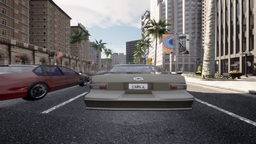

In [5]:
from PIL import Image
from IPython.display import display

# Load the image
image_path = '/home/yz4397/Desktop/Generative_AI/sinfusion-code/images/video/frontal_camera_images/1.png'  # Replace with your image path
image = Image.open(image_path)

# Display the size of the image
print(f"Image size: {image.size} pixels")  # Image.size returns a tuple (width, height)

# Display the image
display(image)


In [ ]:
root_dir = '/home/yz4397/Desktop/Generative_AI/Data/Train/extracted_parts/train_chunks/train'


In [1]:
import os
import shutil

def is_lowest_level_directory(path):
    return all(not os.path.isdir(os.path.join(path, content)) for content in os.listdir(path))

def process_directory(root, target_root):
    for root, dirs, files in os.walk(root):
        print(root)
        # Check if the current directory is the lowest level
        if is_lowest_level_directory(root):
            # print(root)
            # Filter out the required images
            camera0_images = [f for f in files if f.endswith('camera0.png')]
            
            # Sort files for consistent ordering
            camera0_images.sort()

            # Create new folder in target directory
            subfolder_name = os.path.basename(root)
            new_folder_path = os.path.join(target_root, f'frontal_camera_images_{subfolder_name}')
            os.makedirs(new_folder_path, exist_ok=True)

            # Rename and move files
            for idx, filename in enumerate(camera0_images):
                source_file = os.path.join(root, filename)
                new_filename = f"{idx+1}.png"
                destination_file = os.path.join(new_folder_path, new_filename)
                shutil.move(source_file, destination_file)
                print(f'Moved {source_file} to {destination_file}')

# Paths
root_path = '/home/yz4397/Desktop/Generative_AI/Data/Train/extracted_parts/train_chunks/train'
target_path = '/home/yz4397/Desktop/Generative_AI/sinfusion-code/images/video'




In [2]:
process_directory(root_path, target_path)

/home/yz4397/Desktop/Generative_AI/Data/Train/extracted_parts/train_chunks/train
/home/yz4397/Desktop/Generative_AI/Data/Train/extracted_parts/train_chunks/train/2021_08_23_23_08_17
/home/yz4397/Desktop/Generative_AI/Data/Train/extracted_parts/train_chunks/train/2021_08_23_23_08_17/65
/home/yz4397/Desktop/Generative_AI/Data/Train/extracted_parts/train_chunks/train/2021_08_23_23_08_17/65
/home/yz4397/Desktop/Generative_AI/Data/Train/extracted_parts/train_chunks/train/2021_08_23_23_08_17/47
/home/yz4397/Desktop/Generative_AI/Data/Train/extracted_parts/train_chunks/train/2021_08_23_23_08_17/47
/home/yz4397/Desktop/Generative_AI/Data/Train/extracted_parts/train_chunks/train/2021_08_23_23_08_17/56
/home/yz4397/Desktop/Generative_AI/Data/Train/extracted_parts/train_chunks/train/2021_08_23_23_08_17/56
/home/yz4397/Desktop/Generative_AI/Data/Train/extracted_parts/train_chunks/train/2021_09_10_12_07_11
/home/yz4397/Desktop/Generative_AI/Data/Train/extracted_parts/train_chunks/train/2021_09_10_1

In [ ]:
good_ones = ['10719','10710','7917']

In [10]:
import os

def rename_images_in_folder(folder_path):
    # Getting all file names in the folder
    files = sorted(os.listdir(folder_path), key=lambda x: int(os.path.splitext(x)[0]))

    # Renaming each file
    for filename in files:
        # Extracting the current file number and incrementing it by 1
        file_number = int(os.path.splitext(filename)[0])
        new_file_number = file_number + 1

        # Creating old and new file paths
        old_file_path = os.path.join(folder_path, filename)
        new_file_path = os.path.join(folder_path, f'{new_file_number}.png')

        # Renaming the file
        os.rename(old_file_path, new_file_path)
        print(f'Renamed {old_file_path} to {new_file_path}')

def main():
    root_path = '/home/yz4397/Desktop/Generative_AI/sinfusion-code/images/video'
    
    # Iterating through each folder in the root directory
    for folder_name in os.listdir(root_path):
        folder_path = os.path.join(root_path, folder_name)
        if os.path.isdir(folder_path):
            rename_images_in_folder(folder_path)
            print(f'Completed renaming in {folder_path}')

main()


Renamed /home/yz4397/Desktop/Generative_AI/sinfusion-code/images/video/frontal_camera_images_1456/0.png to /home/yz4397/Desktop/Generative_AI/sinfusion-code/images/video/frontal_camera_images_1456/1.png
Renamed /home/yz4397/Desktop/Generative_AI/sinfusion-code/images/video/frontal_camera_images_1456/1.png to /home/yz4397/Desktop/Generative_AI/sinfusion-code/images/video/frontal_camera_images_1456/2.png
Renamed /home/yz4397/Desktop/Generative_AI/sinfusion-code/images/video/frontal_camera_images_1456/2.png to /home/yz4397/Desktop/Generative_AI/sinfusion-code/images/video/frontal_camera_images_1456/3.png
Renamed /home/yz4397/Desktop/Generative_AI/sinfusion-code/images/video/frontal_camera_images_1456/3.png to /home/yz4397/Desktop/Generative_AI/sinfusion-code/images/video/frontal_camera_images_1456/4.png
Renamed /home/yz4397/Desktop/Generative_AI/sinfusion-code/images/video/frontal_camera_images_1456/4.png to /home/yz4397/Desktop/Generative_AI/sinfusion-code/images/video/frontal_camera_ima

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [1]:
from PIL import Image
import os

def resize_images_in_folder(folder_path, output_size=(256, 144)):
    # Iterate over all files in the folder
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif', '.tiff')):
            file_path = os.path.join(folder_path, filename)

            # Open the image
            with Image.open(file_path) as img:
                # Resize the image
                resized_img = img.resize(output_size, Image.ANTIALIAS)

                # Save the resized image, overwriting the original image
                # You can also choose to save to a different location
                resized_img.save(file_path)
                print(f'Resized and saved {filename}')

# Specify your folder path here
folder_path = '/home/yz4397/Desktop/Generative_AI/sinfusion-code/images/video/frontal_camera_images_7655'
resize_images_in_folder(folder_path)


/tmp/ipykernel_3996/1874466931.py:13: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  resized_img = img.resize(output_size, Image.ANTIALIAS)


Resized and saved 7.png
Resized and saved 26.png
Resized and saved 66.png
Resized and saved 77.png
Resized and saved 98.png
Resized and saved 40.png
Resized and saved 73.png
Resized and saved 30.png
Resized and saved 16.png
Resized and saved 79.png
Resized and saved 53.png
Resized and saved 17.png
Resized and saved 87.png
Resized and saved 41.png
Resized and saved 94.png
Resized and saved 56.png
Resized and saved 21.png
Resized and saved 59.png
Resized and saved 37.png
Resized and saved 31.png
Resized and saved 80.png
Resized and saved 22.png
Resized and saved 42.png
Resized and saved 102.png
Resized and saved 65.png
Resized and saved 74.png
Resized and saved 51.png
Resized and saved 86.png
Resized and saved 63.png
Resized and saved 76.png
Resized and saved 23.png
Resized and saved 34.png
Resized and saved 88.png
Resized and saved 84.png
Resized and saved 15.png
Resized and saved 45.png
Resized and saved 90.png
Resized and saved 12.png
Resized and saved 24.png
Resized and saved 3.png
R

In [16]:
from PIL import Image
import glob
import re

# Create a list to hold the images
frames = []

# Your images directory (update this path)
images_directory = '/home/yz4397/Desktop/Generative_AI/sinfusion-code/images/video/frontal_camera_images_207'

def numerical_sort(value):
    numbers = re.compile(r'(\d+)')
    parts = numbers.split(value)
    parts[1::2] = map(int, parts[1::2])
    return parts

file_names = sorted(glob.glob(f"{images_directory}/*.png"), key=numerical_sort)


# Load each file from the directory
for file_name in file_names:
    img = Image.open(file_name)
    # Resize the image
    img_resized = img.resize((256, 144))
    
    print(file_name)
    frames.append(img_resized)

# Save the frames as an animated GIF
frames[0].save('output_207.gif', format='GIF',
               append_images=frames[1:],
               save_all=True,
               duration=400, loop=0)


/home/yz4397/Desktop/Generative_AI/sinfusion-code/images/video/frontal_camera_images_207/1.png
/home/yz4397/Desktop/Generative_AI/sinfusion-code/images/video/frontal_camera_images_207/2.png
/home/yz4397/Desktop/Generative_AI/sinfusion-code/images/video/frontal_camera_images_207/3.png
/home/yz4397/Desktop/Generative_AI/sinfusion-code/images/video/frontal_camera_images_207/4.png
/home/yz4397/Desktop/Generative_AI/sinfusion-code/images/video/frontal_camera_images_207/5.png
/home/yz4397/Desktop/Generative_AI/sinfusion-code/images/video/frontal_camera_images_207/6.png
/home/yz4397/Desktop/Generative_AI/sinfusion-code/images/video/frontal_camera_images_207/7.png
/home/yz4397/Desktop/Generative_AI/sinfusion-code/images/video/frontal_camera_images_207/8.png
/home/yz4397/Desktop/Generative_AI/sinfusion-code/images/video/frontal_camera_images_207/9.png
/home/yz4397/Desktop/Generative_AI/sinfusion-code/images/video/frontal_camera_images_207/10.png
/home/yz4397/Desktop/Generative_AI/sinfusion-code

In [11]:
len(frames)

194